# Prediction Functions

In this notebook we call and run R functions in a Python environment. This is an important step since the random ferns and RANGER algorithms were originally written in R, and most of processes are written in Python.

The following packages are required to run this notebook:

In [86]:
%load_ext rpy2.ipython
import numpy as np
import pandas as pd
import math

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Required R libraries

We can also upload R libraries in this Python environment. To do so, we just have to type `%R` before an R line or command:

In [6]:
%R library(tidyverse)
%R library(randomForest)
%R library(mlbench)
%R library(caret)
%R library(e1071)
%R library(ranger)
%R library(janitor)
%R library(rFerns)

'rFerns','janitor','ranger',...,'datasets','methods','base'


## Python and R interaction

The following cell uploads data using Pandas and the `read_csv()` function:

In [2]:
data = pd.read_csv('data/jmartinez/Data_for_RF_Models/Board_Counts/route_1/direction0/bus_stop_12/data.csv', low_memory= False)
data.head()

,Unnamed: 0,month,service_kind,hour,board_count,mean_temp,mean_precip,month_average_board_count,surrounding_board_count
0,0,1,weekday,12,2,0.245714,0.218182,0.256282,0.854820
1,1,1,weekday,13,0,0.340000,0.208485,0.287528,0.762235
2,2,1,weekday,11,1,0.197044,0.296761,0.206108,0.632354
3,3,1,weekday,11,0,0.197044,0.296761,0.206108,0.632354
4,4,1,weekday,11,2,0.197044,0.296761,0.206108,0.632354


In [3]:
data.month = data['month'].astype(str)
data.hour = data['hour'].astype(str)
data.service_kind = data['service_kind'].astype(str)

data.dtypes

Unnamed: 0                     int64
month                         object
service_kind                  object
hour                          object
board_count                    int64
mean_temp                    float64
mean_precip                  float64
month_average_board_count    float64
surrounding_board_count      float64
dtype: object

In [10]:
#path = paste0('data', '/', 'jmartinez', '/', 'Data_for_RF_Models', '/', 'Board_Counts', '/',
#                  paste('route', rt, sep = '_'), '/', paste('direction', di, sep = ''), '/',
#                  paste('bus_stop', st, sep = '_'), '/')
    
'/'.join(['data','jmartinez','Data_for_RF_Models','Board_Counts', '_'.join(['route','4']),''.join(['direction','0']), '_'.join(['bus_stop','12'])])

'data/jmartinez/Data_for_RF_Models/Board_Counts/route_4/direction0/bus_stop_12'

## Get trained model prediction

In [178]:
def predict_boarding_py(rt, di, st, part, serv, mn, hr): 
    
    # Define folder path:
    
    path = '/'.join(['data','jmartinez','Data_for_RF_Models','Board_Counts',
                     '_'.join(['route',rt]),''.join(['direction',di]),
                     '_'.join(['bus_stop',st])])
    
    # Select data partition:
    
    if part == 'pre':
        
        # Load Performance data to select 'Best Model':
        
        Pre_GLM_RMSEs_file_path = '/'.join([path,'Pre_All_RMSEs.csv'])
        Pre_GLM_RMSEs = pd.read_csv(Pre_GLM_RMSEs_file_path)
        Pre_RMSEs = pd.DataFrame(Pre_GLM_RMSEs.loc[1]).T.reset_index(drop = True)
                
        Pre_RF_Vanilla_RMSE_file_path = '/'.join([path, 'pre_RF_Vanilla_Performance.csv'])
        Pre_RF_Vanilla_RMSE = pd.read_csv(Pre_RF_Vanilla_RMSE_file_path)
        Pre_RF_Vanilla_RMSE = pd.DataFrame(Pre_RF_Vanilla_RMSE['Test'])
        Pre_RF_Vanilla_RMSE.columns = ['RF_Vanilla']
        
        Pre_RMSEs['RF_Vanilla'] = Pre_RF_Vanilla_RMSE['RF_Vanilla']
        
        Pre_RF_Chart_file_path = '/'.join([path, 'pre_RF_Chart.csv'])
        Pre_RF_Chart = pd.read_csv(Pre_RF_Chart_file_path)
        Pre_ZI_RF_RMSE = math.sqrt(np.mean((Pre_RF_Chart['board_count'] - Pre_RF_Chart['RF_Pred'])**2))
        
        Pre_RMSEs['ZI_RF'] = Pre_ZI_RF_RMSE
        Pre_RMSEs = Pre_RMSEs.iloc[: , 1:]
        
        Pre_All_RMSEs = Pre_RMSEs.T
        Pre_All_RMSEs.columns = ['Test']
        
        Best_Model = np.argmin(Pre_All_RMSEs['Test'])
        
        #return(Best_Model)
        
        if Best_Model == 6:
            
            data_File_path = '/'.join([path, 'pre_RF_Chart.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)]
            
            return(out_data)
            
            #if load == 'yes':
            #    
            #    model_file_path = '/'.join([path, 'Pre_Random_Ferns_model.rds'])
            #    %R model_classifier = readRDS(model_file_path)
            #    %R model_print = print(model_classifier)
            #    
            #    %R return(model_print)
            #                               
            #elif load == 'no':
            #                               
            #    return(out_data)                           
        elif Best_Model == 5:
            
            data_File_path = '/'.join([path, 'pre_RF_Vanilla_Chart.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)]
                
            return(out_data)
        
        elif Best_Model == 4:
            
            data_File_path = '/'.join([path, 'Pre_Chart_Predictions.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)][['month', 'service_kind',
                                                                                                            'hour', 'board_count',
                                                                                                            'mean_temp', 'mean_precip',
                                                                                                            'month_average_board_count',
                                                                                                            'surrounding_board_count',
                                                                                                            'Hurdle_Predictions']]
            #out_data = 
            return(out_data)
        
        elif Best_Model == 3:
            
            data_File_path = '/'.join([path, 'Pre_Chart_Predictions.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)][['month', 'service_kind',
                                                                                                            'hour', 'board_count',
                                                                                                            'mean_temp', 'mean_precip',
                                                                                                            'month_average_board_count',
                                                                                                            'surrounding_board_count',
                                                                                                            'ZIP_Predictions']]
            #out_data = 
            return(out_data)
        
        elif Best_Model == 2:
            
            data_File_path = '/'.join([path, 'Pre_Chart_Predictions.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)][['month', 'service_kind',
                                                                                                            'hour', 'board_count',
                                                                                                            'mean_temp', 'mean_precip',
                                                                                                            'month_average_board_count',
                                                                                                            'surrounding_board_count',
                                                                                                            'ZINB_Predictions']]
            #out_data = 
            return(out_data)
        
        elif Best_Model == 1:
            
            data_File_path = '/'.join([path, 'Pre_Chart_Predictions.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)][['month', 'service_kind',
                                                                                                            'hour', 'board_count',
                                                                                                            'mean_temp', 'mean_precip',
                                                                                                            'month_average_board_count',
                                                                                                            'surrounding_board_count',
                                                                                                            'NB_Predictions']]
            #out_data = 
            return(out_data)
        
        elif Best_Model == 0:
            
            data_File_path = '/'.join([path, 'Pre_Chart_Predictions.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)][['month', 'service_kind',
                                                                                                            'hour', 'board_count',
                                                                                                            'mean_temp', 'mean_precip',
                                                                                                            'month_average_board_count',
                                                                                                            'surrounding_board_count',
                                                                                                            'Poiss_Predictions']]
            #out_data = 
            return(out_data)
    
    elif part == 'post':
        
        # Load Performance data to select 'Best Model':
        
        Post_GLM_RMSEs_file_path = '/'.join([path,'Post_All_RMSEs.csv'])
        Post_GLM_RMSEs = pd.read_csv(Post_GLM_RMSEs_file_path)
        Post_RMSEs = pd.DataFrame(Post_GLM_RMSEs.loc[1]).T.reset_index(drop = True)
                
        Post_RF_Vanilla_RMSE_file_path = '/'.join([path, 'post_RF_Vanilla_Performance.csv'])
        Post_RF_Vanilla_RMSE = pd.read_csv(Post_RF_Vanilla_RMSE_file_path)
        Post_RF_Vanilla_RMSE = pd.DataFrame(Post_RF_Vanilla_RMSE['Test'])
        Post_RF_Vanilla_RMSE.columns = ['RF_Vanilla']
        
        Post_RMSEs['RF_Vanilla'] = Post_RF_Vanilla_RMSE['RF_Vanilla']
        
        Post_RF_Chart_file_path = '/'.join([path, 'post_RF_Chart.csv'])
        Post_RF_Chart = pd.read_csv(Post_RF_Chart_file_path)
        Post_ZI_RF_RMSE = math.sqrt(np.mean((Post_RF_Chart['board_count'] - Post_RF_Chart['RF_Pred'])**2))
        
        Post_RMSEs['ZI_RF'] = Post_ZI_RF_RMSE
        Post_RMSEs = Post_RMSEs.iloc[: , 1:]
        
        Post_All_RMSEs = Post_RMSEs.T
        Post_All_RMSEs.columns = ['Test']
        
        Best_Model = np.argmin(Post_All_RMSEs['Test'])
        
        #return(Best_Model)
        
        if Best_Model == 6:
            
            data_File_path = '/'.join([path, 'post_RF_Chart.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)]
                
            return(out_data)
        
        elif Best_Model == 5:
            
            data_File_path = '/'.join([path, 'post_RF_Vanilla_Chart.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)]
                
            return(out_data)
        
        elif Best_Model == 4:
            
            data_File_path = '/'.join([path, 'Post_Chart_Predictions.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)][['month', 'service_kind',
                                                                                                            'hour', 'board_count',
                                                                                                            'mean_temp', 'mean_precip',
                                                                                                            'month_average_board_count',
                                                                                                            'surrounding_board_count',
                                                                                                            'Hurdle_Predictions']]
            #out_data = 
            return(out_data)
        
        elif Best_Model == 3:
            
            data_File_path = '/'.join([path, 'Post_Chart_Predictions.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)][['month', 'service_kind',
                                                                                                            'hour', 'board_count',
                                                                                                            'mean_temp', 'mean_precip',
                                                                                                            'month_average_board_count',
                                                                                                            'surrounding_board_count',
                                                                                                            'ZIP_Predictions']]
            #out_data = 
            return(out_data)
        
        elif Best_Model == 2:
            
            data_File_path = '/'.join([path, 'Post_Chart_Predictions.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)][['month', 'service_kind',
                                                                                                            'hour', 'board_count',
                                                                                                            'mean_temp', 'mean_precip',
                                                                                                            'month_average_board_count',
                                                                                                            'surrounding_board_count',
                                                                                                            'ZINB_Predictions']]
            #out_data = 
            return(out_data)
        
        elif Best_Model == 1:
            
            data_File_path = '/'.join([path, 'Post_Chart_Predictions.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)][['month', 'service_kind',
                                                                                                            'hour', 'board_count',
                                                                                                            'mean_temp', 'mean_precip',
                                                                                                            'month_average_board_count',
                                                                                                            'surrounding_board_count',
                                                                                                            'NB_Predictions']]
            #out_data = 
            return(out_data)
        
        elif Best_Model == 0:
            
            data_File_path = '/'.join([path, 'Post_Chart_Predictions.csv'])
            data = pd.read_csv(data_File_path)
            data = data.iloc[: , 1:]
            
            data.month = data['month'].astype(str)
            data.hour = data['hour'].astype(str)
            data.service_kind = data['service_kind'].astype(str)

            out_data = data[(data['service_kind'] == serv) & (data['month'] == mn) & (data['hour'] == hr)][['month', 'service_kind',
                                                                                                            'hour', 'board_count',
                                                                                                            'mean_temp', 'mean_precip',
                                                                                                            'month_average_board_count',
                                                                                                            'surrounding_board_count',
                                                                                                            'Poiss_Predictions']]
            #out_data = 
            return(out_data)
    
    
    

In [186]:
predict_boarding_py('1', '0', '1351', 'post', 'weekday', '3', '15')

,month,service_kind,hour,board_count,mean_temp,mean_precip,month_average_board_count,surrounding_board_count,RF_Pred
0,3,weekday,15,1,0.319444,0.75,0.515015,0.956157,2.432553


There is another option to integrate R commands or functions in a cell without having to write `%R` before each line. The following cell shows how to use the `%%R -i data` command to convert a Python cell into an R "chunck":

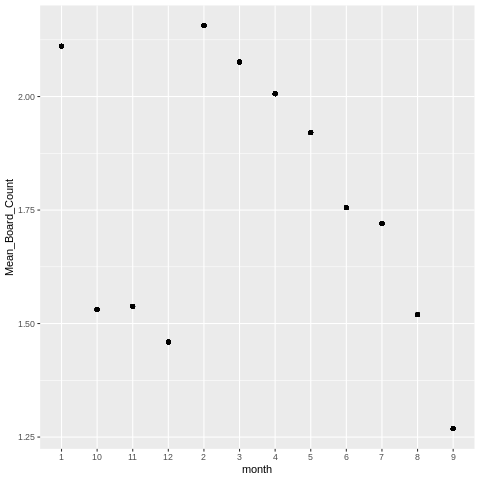

In [27]:
%%R -i data
data %>%
    group_by(month) %>%
    mutate(Mean_Board_Count = mean(board_count)) %>%
    ggplot(aes(x = month, y = Mean_Board_Count)) + geom_point()

# Board Count Prediction


In [30]:
%%R -i data

predict_boarding <- function(rt, di, st, part, serv, mn, hr){
    
    library(randomForest)
    library(mlbench)
    library(caret)
    library(e1071)
    library(tidyverse)
    library(readr)
    library(ranger)
    library(janitor)
    library(rFerns)
    library(pscl)
    library(MASS)
    
                
    path = paste0('data', '/', 'jmartinez', '/', 'Data_for_RF_Models', '/', 'Board_Counts', '/',
                  paste('route', rt, sep = '_'), '/', paste('direction', di, sep = ''), '/',
                  paste('bus_stop', st, sep = '_'), '/')
    
    # Load Performance data.frame:
    
    if(part == 'pre'){
        Pre_GLM_RMSEs_file_path = paste(path, 'Pre_All_RMSEs.csv', sep = '/')
        Pre_GLM_RMSEs = read_csv(Pre_GLM_RMSEs_file_path)
        Pre_RMSEs = Pre_GLM_RMSEs[-c(1), ]
        
        Pre_RF_Vanilla_RMSE_file_path = paste(path, 'pre_RF_Vanilla_Performance.csv', sep = '/')
        Pre_RF_Vanilla_RMSE = read_csv(Pre_RF_Vanilla_RMSE_file_path)
        Pre_RF_Vanilla_RMSE = Pre_RF_Vanilla_RMSE$Test
        
        Pre_RMSEs$RF_Vanilla = Pre_RF_Vanilla_RMSE
        
        Pre_RF_Chart_file_path = paste(path, 'pre_RF_Chart.csv', sep = '/')
        Pre_RF_Chart = read_csv(Pre_RF_Chart_file_path)
        Pre_ZI_RF_RMSE = sqrt(mean((Pre_RF_Chart$board_count - Pre_RF_Chart$RF_Pred)^{2}))
        
        Pre_RMSEs$ZI_RF = Pre_ZI_RF_RMSE
        
        Pre_All_RMSEs = t(Pre_RMSEs)
        
        Best_Model = which.min(Pre_All_RMSEs)
                
        if(Best_Model == 8){
            pre_Random_Ferns_model_file_path = paste(path, 'Pre_Random_Ferns_model.rds', sep = ' ')
            pre_Random_Ferns = readRDS(pre_Random_Ferns_model_file_path)
            
            pre_Random_Forest_RANGER_model_file_path = paste(path, 'Pre_Random_Forest_RANGER_model.rds', sep = ' ')
            pre_Random_Forest_RANGER = readRDS(pre_Random_Forest_RANGER_model_file_path)
            
            pre_RF_Chart_File_path = paste(path, 'pre_RF_Chart.csv', sep = '')
            pre_RF_Chart = read_csv(pre_RF_Chart_File_path)
            
            out_data <- pre_RF_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr)
                
            return(out_data)
                        
        }
        else if(Best_Model == 7){
            pre_RF_Vanilla_file_path = paste(path, 'Pre_RF_Vanilla_model.rds', sep = '')
            pre_RF_Vanilla = readRDS(pre_RF_Vanilla_file_path)
            
            pre_RF_Vanilla_Chart_File_path = paste(path, 'pre_RF_Vanilla_Chart.csv', sep = '')
            pre_RF_Vanilla_Chart = read_csv(pre_RF_Vanilla_Chart_File_path)
            
            out_data <- pre_RF_Vanilla_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr)
                
            return(out_data)
        }
        else if(Best_Model == 6){
            pre_Hurdle_file_path = paste(path, 'Pre_Hurdle_model.rds', sep = '')
            pre_Hurdle = readRDS(pre_Hurdle_file_path)
            
            pre_Chart_File_path = paste(path, 'pre_Chart.csv', sep = '')
            pre_Chart = read_csv(pre_Chart_File_path)
            
            out_data <- pre_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr)
                
            return(out_data)
        }
        else if(Best_Model == 5){
            pre_ZINB_file_path = paste(path, 'pre_ZINB_model.rds', sep = '')
            pre_ZINB = readRDS(pre_ZINB_file_path)
            
            pre_Chart_File_path = paste(path, 'pre_Chart.csv', sep = '')
            pre_Chart = read_csv(pre_Chart_File_path)
            
            out_data <- pre_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr) %>%
                summarize(ZINB_pred)
                
            return(out_data)
        }
        else if(Best_Model == 4){
            pre_ZIP_file_path = paste(path, 'pre_ZIP_model.rds', sep = '')
            pre_ZIP = readRDS(pre_ZIP_file_path)
            
            pre_Chart_File_path = paste(path, 'pre_Chart.csv', sep = '')
            pre_Chart = read_csv(pre_Chart_File_path)
            
            out_data <- pre_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr) %>%
                summarize(ZIP_pred)
                
            return(out_data)
        }
        else if(Best_Model == 3){
            pre_NB_file_path = paste(path, 'pre_NB_model.rds', sep = '')
            pre_NB = readRDS(pre_NB_file_path)
            
            pre_Chart_File_path = paste(path, 'pre_Chart.csv', sep = '')
            pre_Chart = read_csv(pre_Chart_File_path)
            
            out_data <- pre_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr) %>%
                summarize(NB_pred)
                
            return(out_data)
        }
        else if(Best_Model == 2){
            pre_Poiss_file_path = paste(path, 'pre_Poisson_model.rds', sep = '')
            pre_Poiss = readRDS(pre_Poiss_file_path)
            
            pre_Chart_File_path = paste(path, 'pre_Chart.csv', sep = '')
            pre_Chart = read_csv(pre_Chart_File_path)
            
            out_data <- pre_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr) %>%
                summarize(Poiss_pred)
                
            return(out_data)
        }
        
        
    }
    else if(part == 'post'){
        Post_GLM_RMSEs_file_path = paste(path, 'Post_All_RMSEs.csv', sep = '/')
        Post_GLM_RMSEs = read_csv(Post_GLM_RMSEs_file_path)
        Post_RMSEs = Post_GLM_RMSEs[-c(1), ]
        
        Post_RF_Vanilla_RMSE_file_path = paste(path, 'post_RF_Vanilla_Performance.csv', sep = '/')
        Post_RF_Vanilla_RMSE = read_csv(Post_RF_Vanilla_RMSE_file_path)
        Post_RF_Vanilla_RMSE = Post_RF_Vanilla_RMSE$Test
        
        Post_RMSEs$RF_Vanilla = Post_RF_Vanilla_RMSE
        
        Post_RF_Chart_file_path = paste(path, 'post_RF_Chart.csv', sep = '/')
        Post_RF_Chart = read_csv(Post_RF_Chart_file_path)
        Post_ZI_RF_RMSE = sqrt(mean((Post_RF_Chart$board_count - Post_RF_Chart$RF_Pred)^{2}))
        
        Post_RMSEs$ZI_RF = Post_ZI_RF_RMSE
        
        Post_All_RMSEs = t(Post_RMSEs)
        
        Best_Model = which.min(Post_All_RMSEs)
                
        if(Best_Model == 8){
            post_Random_Ferns_model_file_path = paste(path, 'Post_Random_Ferns_model.rds', sep = ' ')
            post_Random_Ferns = readRDS(post_Random_Ferns_model_file_path)
            
            post_Random_Forest_RANGER_model_file_path = paste(path, 'Post_Random_Forest_RANGER_model.rds', sep = ' ')
            post_Random_Forest_RANGER = readRDS(post_Random_Forest_RANGER_model_file_path)
            
            post_RF_Chart_File_path = paste(path, 'post_RF_Chart.csv', sep = '')
            post_RF_Chart = read_csv(post_RF_Chart_File_path)
            
            
            out_data <- post_RF_Chart %>%
                  filter(service_kind == serv, month == mn, hour == hr)
                
            return(out_data)
                        
        }
        else if(Best_Model == 7){
            post_RF_Vanilla_file_path = paste(path, 'Post_RF_Vanilla_model.rds', sep = '')
            post_RF_Vanilla = readRDS(post_RF_Vanilla_file_path)
            
            out_data <- post_RF_Vanilla_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr)
                
            return(out_data)
        }
        else if(Best_Model == 6){
            post_Hurdle_file_path = paste(path, 'Post_Hurdle_model.rds', sep = '')
            post_Hurdle = readRDS(post_Hurdle_file_path)
            
            post_Chart_File_path = paste(path, 'post_Chart.csv', sep = '')
            post_Chart = read_csv(post_Chart_File_path)
            
            out_data <- post_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr)
                
            return(out_data)
        }
        else if(Best_Model == 5){
            post_ZINB_file_path = paste(path, 'post_ZINB_model.rds', sep = '')
            post_ZINB = readRDS(post_ZINB_file_path)
            
            post_Chart_File_path = paste(path, 'post_Chart.csv', sep = '')
            post_Chart = read_csv(post_Chart_File_path)
            
            out_data <- post_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr) %>%
                summarize(ZINB_pred)
                
            return(out_data)
        }
        else if(Best_Model == 4){
            post_ZIP_file_path = paste(path, 'post_ZIP_model.rds', sep = '')
            post_ZIP = readRDS(post_ZIP_file_path)
            
            post_Chart_File_path = paste(path, 'post_Chart.csv', sep = '')
            post_Chart = read_csv(post_Chart_File_path)
            
            out_data <- post_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr) %>%
                summarize(ZIP_pred)
                
            return(out_data)
        }
        else if(Best_Model == 3){
            post_NB_file_path = paste(path, 'post_NB_model.rds', sep = '')
            post_NB = readRDS(post_NB_file_path)
            
            post_Chart_File_path = paste(path, 'post_Chart.csv', sep = '')
            post_Chart = read_csv(post_Chart_File_path)
            
            out_data <- post_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr) %>%
                summarize(NB_pred)
                
            return(out_data)
        }
        else if(Best_Model == 2){
            post_Poiss_file_path = paste(path, 'post_Poisson_model.rds', sep = '')
            post_Poiss = readRDS(post_Poiss_file_path)
            
            post_Chart_File_path = paste(path, 'post_Chart.csv', sep = '')
            post_Chart = read_csv(post_Chart_File_path)
            
            out_data <- post_Chart %>%
                filter(service_kind == serv, month == mn, hour == hr) %>%
                summarize(Poiss_pred)
                
            return(out_data)
        }
    }
    else{
        
        return('This bus stop does not have trained models for predictions.')
            
    }       
}

# Classification Example with Random Ferns

In [32]:
%R predict_boarding('1', '0', '1351', 'post', 'weekday', '3', '15')


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  Poiss_RMSE = col_double(),
  NB_RMSE = col_double(),
  ZIP_RMSE = col_double(),
  ZINB_RMSE = col_double(),
  Hurdle_RMSE = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Train = col_double(),
  Test = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  month = col_double(),
  service_kind = col_character(),
  hour = col_double(),
  board_count = col_double(),
  mean_temp = col_double(),
  mean_precip = col_double(),
  month_average_board_count = col_double(),
  surrounding_board_count = col_double(),
  RF_Pred = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  month = col_double(),
  service_kind = col_character(),
  hour = col_double(),
  boar

,X1,month,service_kind,hour,board_count,mean_temp,mean_precip,month_average_board_count,surrounding_board_count,RF_Pred
1,1.0,3.0,weekday,15.0,1.0,0.319444,0.75,0.515015,0.956157,2.432553


# Maximum Occupancy Prediction

In [34]:
%%R -i data

predict_max_occupancy <- function(rt, di, tr, part, hr){
    
    library(randomForest)
    library(mlbench)
    library(caret)
    library(e1071)
    library(tidyverse)
    library(readr)
    library(ranger)
    library(janitor)
    library(rFerns)
    library(pscl)
    library(MASS)
    
                
    path = paste0('data', '/', 'jmartinez', '/', 'Max_Occupancy_Trips', '/', 'Results', '/',
                  paste('route', rt, sep = '_'), '/', paste(part, 'lockdown', sep = '_'), '/',
                  paste('direction', di, sep = ''), '/',
                  tr, '/')
    
    # Load Performance data.frame:
    
    if(part == 'Pre'){
        Pre_GLM_RMSEs_file_path = paste(path, 'Pre_RMSEs.csv', sep = '')
        Pre_GLM_RMSEs = read_csv(Pre_GLM_RMSEs_file_path)
        Pre_RMSEs = Pre_GLM_RMSEs[-c(1), ]

        
        Pre_RF_Vanilla_RMSE_file_path = paste(path, 'Pre_RF_RMSEs.csv', sep = '')
        Pre_RF_Vanilla_RMSE = read_csv(Pre_RF_Vanilla_RMSE_file_path)
        Pre_RF_Vanilla_RMSE = Pre_RF_Vanilla_RMSE$Test
        
        Pre_RMSEs$RF_Vanilla = Pre_RF_Vanilla_RMSE
        
        Pre_RF_Chart_file_path = paste(path, 'Pre_Zero_Inf_RF_Chart.csv', sep = '')
        Pre_RF_Chart = read_csv(Pre_RF_Chart_file_path)
        Pre_ZI_RF_RMSE = sqrt(mean((Pre_RF_Chart$max_occupancy - Pre_RF_Chart$RF_Pred)^{2}))
        
        Pre_RMSEs$ZI_RF = Pre_ZI_RF_RMSE
        
        Pre_All_RMSEs = t(Pre_RMSEs)
        
        Best_Model = which.min(Pre_All_RMSEs)
        
                        
        if(Best_Model == 8){
            #pre_Random_Ferns_model_file_path = paste(path, 'Pre_Random_Ferns_model.rds', sep = ' ')
            #pre_Random_Ferns = readRDS(pre_Random_Ferns_model_file_path)
            
            #pre_Random_Forest_RANGER_model_file_path = paste(path, 'Pre_Random_Forest_RANGER_model.rds', sep = ' ')
            #pre_Random_Forest_RANGER = readRDS(pre_Random_Forest_RANGER_model_file_path)
            
            data_File_path = paste(path, 'Pre_Zero_Inf_RF_Chart.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr)
                
            return(out_data)
                        
        }
        else if(Best_Model == 7){
            #pre_RF_Vanilla_file_path = paste(path, 'Pre_RF_Vanilla_model.rds', sep = '')
            #pre_RF_Vanilla = readRDS(pre_RF_Vanilla_file_path)
            
            data_File_path = paste(path, 'Pre_Chart_Predictions.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr)
                
            return(out_data)
        }
        else if(Best_Model == 6){
            #pre_Hurdle_file_path = paste(path, 'Pre_Hurdle_model.rds', sep = '')
            #pre_Hurdle = readRDS(pre_Hurdle_file_path)
            
            data_File_path = paste(path, 'Pre_Chart_glm_Predictions.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr) %>%
                summarise(max_occupancy, Hurdle_Predictions)
                
            return(out_data)
        }
        else if(Best_Model == 5){
            
            data_File_path = paste(path, 'Pre_Chart_glm_Predictions.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr) %>%
                summarise(max_occupancy, ZINB_Predictions)
                
            return(out_data)
        }
        else if(Best_Model == 4){
           data_File_path = paste(path, 'Pre_Chart_glm_Predictions.csv', sep = '')
           data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr) %>%
                summarise(max_occupancy, ZIP_Predictions)
                
            return(out_data)
        }
        else if(Best_Model == 3){
            data_File_path = paste(path, 'Pre_Chart_glm_Predictions.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr) %>%
                summarise(max_occupancy, NB_Predictions)
                
            return(out_data)
        }
        else if(Best_Model == 2){
            data_File_path = paste(path, 'Pre_Chart_glm_Predictions.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- Pre_Chart %>%
                filter(hour == hr) %>%
                summarise(max_occupancy, Poiss_Predictions)
                
            return(out_data)
        }
    }
    else if(part == 'post'){
        Post_GLM_RMSEs_file_path = paste(path, 'Post_RMSEs.csv', sep = '')
        Post_GLM_RMSEs = read_csv(Post_GLM_RMSEs_file_path)
        Post_RMSEs = Pre_GLM_RMSEs[-c(1), ]

        
        Post_RF_Vanilla_RMSE_file_path = paste(path, 'Post_RF_RMSEs.csv', sep = '')
        Post_RF_Vanilla_RMSE = read_csv(Post_RF_Vanilla_RMSE_file_path)
        Post_RF_Vanilla_RMSE = Post_RF_Vanilla_RMSE$Test
        
        Post_RMSEs$RF_Vanilla = Post_RF_Vanilla_RMSE
        
        Post_RF_Chart_file_path = paste(path, 'Post_Zero_Inf_RF_Chart.csv', sep = '')
        Post_RF_Chart = read_csv(Post_RF_Chart_file_path)
        Post_ZI_RF_RMSE = sqrt(mean((Post_RF_Chart$max_occupancy - Post_RF_Chart$RF_Pred)^{2}))
        
        Post_RMSEs$ZI_RF = Post_ZI_RF_RMSE
        
        Post_All_RMSEs = t(Post_RMSEs)
        
        Best_Model = which.min(Post_All_RMSEs)
                
        if(Best_Model == 8){
            #pre_Random_Ferns_model_file_path = paste(path, 'Pre_Random_Ferns_model.rds', sep = ' ')
            #pre_Random_Ferns = readRDS(pre_Random_Ferns_model_file_path)
            
            #pre_Random_Forest_RANGER_model_file_path = paste(path, 'Pre_Random_Forest_RANGER_model.rds', sep = ' ')
            #pre_Random_Forest_RANGER = readRDS(pre_Random_Forest_RANGER_model_file_path)
            
            data_File_path = paste(path, 'Post_Zero_Inf_RF_Chart.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr)
                
            return(out_data)
                        
        }
        else if(Best_Model == 7){
            #pre_RF_Vanilla_file_path = paste(path, 'Pre_RF_Vanilla_model.rds', sep = '')
            #pre_RF_Vanilla = readRDS(pre_RF_Vanilla_file_path)
            
            data_File_path = paste(path, 'Pre_Chart_Predictions.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr)
                
            return(out_data)
        }
        else if(Best_Model == 6){
            #pre_Hurdle_file_path = paste(path, 'Pre_Hurdle_model.rds', sep = '')
            #pre_Hurdle = readRDS(pre_Hurdle_file_path)
            
            data_File_path = paste(path, 'Pre_Chart_glm_Predictions.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr) %>%
                summarise(max_occupancy, Hurdle_Predictions)
                
            return(out_data)
        }
        else if(Best_Model == 5){
            
            data_File_path = paste(path, 'Pre_Chart_glm_Predictions.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr) %>%
                summarise(max_occupancy, ZINB_Predictions)
                
            return(out_data)
        }
        else if(Best_Model == 4){
           data_File_path = paste(path, 'Pre_Chart_glm_Predictions.csv', sep = '')
           data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr) %>%
                summarise(max_occupancy, ZIP_Predictions)
                
            return(out_data)
        }
        else if(Best_Model == 3){
            data_File_path = paste(path, 'Pre_Chart_glm_Predictions.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr) %>%
                summarise(max_occupancy, NB_Predictions)
                
            return(out_data)
        }
        else if(Best_Model == 2){
            data_File_path = paste(path, 'Pre_Chart_glm_Predictions.csv', sep = '')
            data = read_csv(data_File_path)
            
            out_data <- data %>%
                filter(hour == hr) %>%
                summarise(max_occupancy, Poiss_Predictions)
                
            return(out_data)
        }
    }
    else{
        
        return('This bus stop does not have trained models for predictions.')
            
    }       
}

In [35]:
%R predict_max_occupancy('1', '0', '132994', 'Pre', '5')


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  Poiss_RMSE = col_double(),
  NB_RMSE = col_double(),
  ZIP_RMSE = col_double(),
  ZINB_RMSE = col_double(),
  Hurdle_RMSE = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  Train = col_double(),
  Test = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  hour = col_double(),
  max_occupancy = col_double(),
  mean_temp = col_double(),
  mean_precip = col_double(),
  RF_Pred = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  hour = col_double(),
  max_occupancy = col_double(),
  mean_temp = col_double(),
  mean_precip = col_double(),
  RF_Pred = col_double()
)



,X1,hour,max_occupancy,mean_temp,mean_precip,RF_Pred
1,3.0,5.0,5.0,0.278732,0.000000,2.751268
2,5.0,5.0,5.0,0.177658,0.000000,2.740068
3,6.0,5.0,2.0,0.303267,0.000000,2.683932
4,7.0,5.0,4.0,0.227124,0.000000,2.773756
5,8.0,5.0,3.0,0.187188,0.000000,2.746865
6,11.0,5.0,4.0,0.342092,0.000976,2.945956
7,12.0,5.0,2.0,0.431314,0.000000,2.753347
8,14.0,5.0,2.0,0.163955,0.000000,2.742153
9,16.0,5.0,4.0,0.061678,0.000000,2.920181
10,18.0,5.0,3.0,0.304409,0.000000,2.679722
